In [35]:
import numpy as np
import networkx as nx


def covered_edge_neighbors(G):
    covered_edges = []
    
    for i, j in G.edges:
        pa_i = [e for e in G.predecessors(i)]
        pa_j = [e for e in G.predecessors(j)]
        pa_i.append(i)
        
        if set(pa_i) == set(pa_j):
            covered_edges.append((i, j))
            
    return covered_edges

def search_mec(G, H):
    
    visited_dags = []
    queue = [(G, [])]
    
    while queue:
        curr_dag, curr_sequence = queue.pop(0)
        if curr_dag in visited_dags:
            continue
            
        visited_dags.append(curr_dag)

        if nx.is_isomorphic(curr_dag, H):
            return curr_sequence
        
        for i, j in covered_edge_neighbors(curr_dag):
            new_dag = curr_dag.copy()
            new_dag.remove_edge(i, j)
            new_dag.add_edge(j, i)
            queue.append((new_dag, curr_sequence + [(i, j)]))
            
    return None

In [20]:
num_examples = 3

examples = []
for ix in range(num_examples):
    a1 = np.loadtxt(f"mec_examples/starting_dag{ix}.csv")
    a2 = np.loadtxt(f"mec_examples/ending_dag{ix}.csv")
    starting_dag = nx.from_numpy_array(a1, create_using=nx.DiGraph)
    ending_dag = nx.from_numpy_array(a2, create_using=nx.DiGraph)
    examples.append((starting_dag, ending_dag))

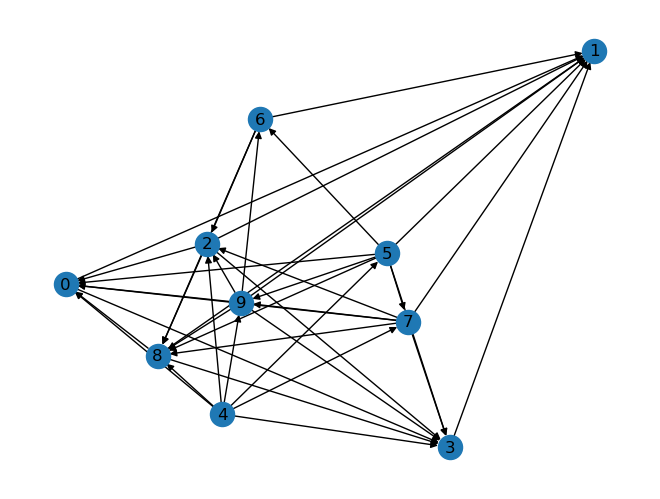

In [9]:
a1 = np.loadtxt(f"mec_examples/starting_dag1.csv")
a2 = np.loadtxt(f"mec_examples/ending_dag1.csv")
starting_dag = nx.from_numpy_array(a1, create_using=nx.DiGraph)
ending_dag = nx.from_numpy_array(a2, create_using=nx.DiGraph)
examples.append((starting_dag, ending_dag))
nx.draw(starting_dag, with_labels=True)

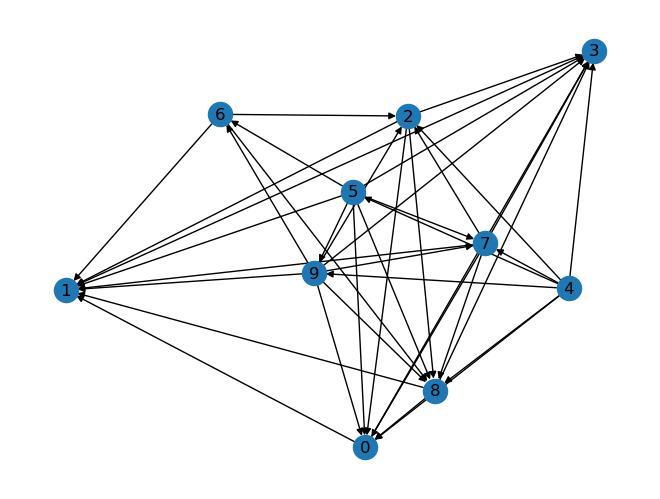

In [10]:
nx.draw(ending_dag, with_labels=True)

In [46]:
# PART A
for starting_dag, _ in examples:
    num_neighbors = len(covered_edge_neighbors(starting_dag))
    print(num_neighbors)

# PART B
for starting_dag, ending_dag in examples:
    path = search_mec(starting_dag, ending_dag)
    print(f"Length of path: {len(path)}")

5
4
4
Length of path: 4
Length of path: 1
Length of path: 3
